In [53]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [55]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [56]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [59]:
y = df['b_labels'].values

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
# https://www.etutorialspoint.com/index.php/386-tf-idf-tfidfvectorizer-tutorial-with-examples
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['data'])

In [62]:
# https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
# count_vectorizer = CountVectorizer(decode_error='ignore')
# X = count_vectorizer.fit_transform(df['data'])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [64]:
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9651754620948299

In [65]:
model.score(X_test, y_test)

0.957041870581838

In [66]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

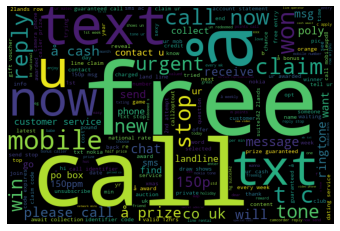

In [67]:
visualize('spam')

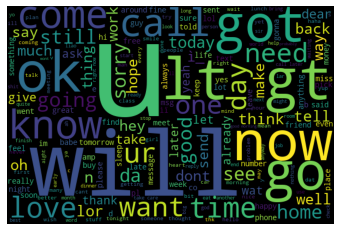

In [68]:
visualize('ham')

In [69]:
df['predictions'] = model.predict(X)
df.head()

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [70]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)
    print('----------------------')

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
----------------------
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
----------------------
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
----------------------
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
----------------------
Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 
----------------------
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
----------------------
Your free ringtone is waiting to be col

In [71]:
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)
    print('----------------------')